<a href="https://colab.research.google.com/github/ML-Challenge/week3-supervised-learning/blob/master/L2.Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" /></a>

# Setup

In [ ]:
# Download utils.py to working directory
import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/ML-Challenge/week3-supervised-learning/master/utils.py', 'utils.py')

In [1]:
# Import utils
# We'll be using this module throughout the lesson
import utils

In [2]:
# Import dependencies
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# and setting the size of all plots.
plt.rcParams['figure.figsize'] = [11, 7]

# Regression

In the previous lesson, we used image and political datasets to predict binary and multiclass outcomes. But what if our problem requires a continuous outcome? Regression is best suited to solving such problems. We will learn about fundamental concepts in regression and apply them to predict the life expectancy in a given country using Gapminder data.

## Introduction to regression

In this lesson, we're going to check out the other type of supervised learning problem: regression. In regression tasks, the target value is a continuously varying variable, such as a country's GDP or the price of a house.

### Importing data for supervised learning

In this chapter, we will work with [Gapminder](https://www.gapminder.org/data/) data that is consolidated into one CSV file available in the as `'gapminder.csv'`. Our goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. As in Lesson 1, the dataset has been preprocessed.

Since the target variable here is quantitative, this is a regression problem. To begin, we will fit a linear regression with just one feature: `'fertility'`, which is the average number of children a woman in a given country gives birth to. In later examples, we will use all the features to build regression models.

Before that, however, we need to import the data and get it into the form needed by scikit-learn. This involves creating features and target variable arrays. Furthermore, since you are going to use only one feature, to begin with, we need to do some reshaping using NumPy's `.reshape()` method.

In [3]:
# Import numpy and pandas
import numpy as np
import pandas as pd

In [4]:
# Read the CSV file into a DataFrame: df
gapminder = pd.read_csv('data/gapminder.csv')

In [5]:
# Create arrays for features and target variable
y = gapminder['life'].values
X = gapminder['fertility'].values

In [6]:
# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)


In [7]:
# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

In [8]:
# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


### Exploring the Gapminder data

As always, it is important to explore the data before building models. Below, we have constructed a heatmap showing the correlation between the different features of the Gapminder dataset. Cells that are in green show positive correlation, while cells that are in red show a negative correlation. Take a moment to explore this: Which features are positively correlated with life, and which ones are negatively correlated? Does this match your intuition?

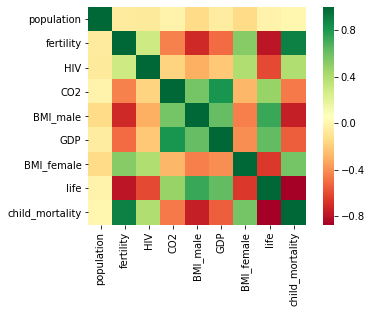

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# df.corr() computes the pairwise correlation between columns
sns.heatmap(gapminder.corr(), square=True, cmap='RdYlGn')

Let's explore the DataFrame using pandas methods such as `.info()`, `.describe()`, `.head()`

In [10]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB


In [11]:
gapminder.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [12]:
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


## The basics of linear regression

### Regression mechanics

How does linear regression actually work? We want to fit a line to the data, and a line in tow dimensions is always of the form `y = ax + b`, where `y` is the target, `x` is the single feature, and `a` and `b` are the parameters of the model that we want to learn. So the questions of `fitting` is reduced to how do we choose `a` and `b`?

A common method is to define an error function for any given line and then to choose the line that minimizes the error function. Such an error function is also called a loss or a cost function. What will our loss function be?

![Data](assets/loss_function_1.png)

### The loss function

Intuitively, we want a line to be as close to the actual data points as possible.

![Line](assets/loss_function_2.png)

For this reason, we wish to minimize the vertical distance between the fit and the data. So for each data point, we calculate the vertical distance between it and the line.

![Distances](assets/loss_function_3.png)

This distance is called a residual. We can try to minimize the sum of the residuals, but then a large positive residual would cancel out a large negative residual. 
![Residuals](assets/loss_function_4.png)
For this reason, we minimize the sum of the squares of the residuals! This will be our loss function and using this loss function is commonly called ordinary least squares, or `OLS` for short. This is the same as minimizing the mean squared error of the predictions on the training set.

When you call fit on a linear regression model in `scikit-learn`, it performs this `OLS` under the hood.

### Linear regression in higher dimensions

When we have to features and one target, a line is of the form: y = a<sub>1</sub>x<sub>1</sub> + a<sub>2</sub>x<sub>2</sub> + b, so to fit a linear regression model is to specify three variables: a<sub>1<sub>, a<sub>2</sub> and b.
    
In higher dimensions, that is, when we have more than one or two features, a line is of this form y = a<sub>1</sub>x<sub>1</sub> + a<sub>2</sub>x<sub>2</sub> + ... + a<sub>n</sub>x<sub>n</sub> + b, so fitting a linear regression model is to specify a coefficient, a<sub>i</sub>, for each feature, as well as the variable, b.

The `scikit-learn` API works the same in this case: you pass the `.fit()` method two arrays: one containing the features, the other the target variable.

### Fit & predict for regression

Now, we will fit linear regression and predict life expectancy using just one feature. In this example, we will use the `'fertility'` feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is `'life'`.

A scatter plot with `'fertility'` on the x-axis and `'life'` on the y-axis has been generated bellow. As we can see, there is a strong negative correlation, so a linear regression should be able to capture this trend. Our job is to fit linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. We will also compute and print the R<sup>2</sup> score using scikit-learn's `.score()` method.

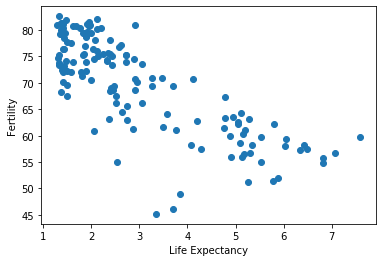

In [13]:
plt.scatter(x='fertility', y='life', data=gapminder[['fertility', 'life']])
plt.xlabel('Life Expectancy')
plt.ylabel('Fertility')
plt.show()

In [14]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

In [15]:
# Create the regressor: reg
reg = LinearRegression()

In [16]:
# Create the prediction space
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)

In [17]:
# Fit the model to the data
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

In [19]:
# Print R^2 
print(reg.score(X, y))

0.6192442167740035


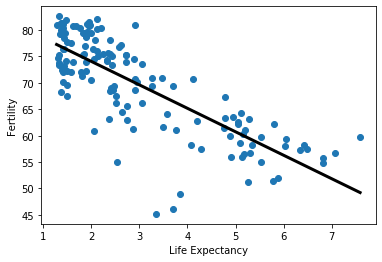

In [20]:
# Plot regression line
plt.scatter(x='fertility', y='life', data=gapminder[['fertility', 'life']])
plt.xlabel('Life Expectancy')
plt.ylabel('Fertility')

plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

### Train/test/split for regression

As we learned in Lesson 1, train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for classification models and is equally true for linear regression models.

In this exercise, we will split the Gapminder dataset into training and testing sets and then fit and predict a linear regression overall features. In addition to computing the R<sup>2</sup> score, we will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models.

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [22]:
# Create arrays for features and target variable
y = gapminder['life'].values
X = gapminder.drop(['life', 'Region'], axis=1).values

In [23]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [24]:
# Create the regressor: reg_all
reg_all = LinearRegression()

In [25]:
# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

In [27]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8380468731430135
Root Mean Squared Error: 3.2476010800369455


Note that generally, we will never use linear regression out of the box like this; we will most likely wish to use regularization, which we'll see next and which places further constraints on the model coefficients.

## Cross-validation

### Cross-validation motivation

We can spot a potential pitfall of this process: if we're computing R squared on our test set, the R squared returned is dependent on the way that we split up the data! The data points in the test set may have some peculiarities that mean the R squared computed on it is not representative of the model's ability to generalize unseen data.

To combat this dependence on what is essentially an arbitrary split, we use a technique called cross-validation.

### Cross-validation basics

We begin by splitting the dataset into five groups or folds. Then we hold out the first fold as a test set, fir out model on the remaining four-folds, predict on the test set, and compute the metric of interest. Next, we hold out the second fold as our test set, fit on the remaining data, predict on the test set, and compute the metric of interest. Then similarly with the third, fourth, and fifth fold.
![5 Fold Cross-validation](assets/5_fold.png)
As a result, we get five values of R squared from which we can compute statistics of interest, such as the mean and median and 95% confidence intervals.

### Cross-validation and model performance

As we split the dataset into five-folds, we call this process 5-fold cross-validation. If we use 10 folds, it is called 10-fold cross-validation. More generally, if we use `k` folds, it is called k-fold cross-validation or `k-fold CV`.

There is, however, a trade-off as using more folds is more computationally expensive. This is because we are fitting and predicting more times. This method avoids the problem of our metric of choice being dependent on the train test split.

### 5-fold cross-validation

Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as, during training, the model is not only trained but also tested on all of the available data.

In this example, we will practice 5-fold cross-validation on the Gapminder data. By default, scikit-learn's `cross_val_score()` function uses R<sup>2</sup> as the metric of choice for regression. Since we are performing 5-fold cross-validation, the function will return 5 scores. Our job is to compute these 5 scores and then take their average.

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
# Create a linear regression object: reg
reg = LinearRegression()

In [30]:
# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

In [31]:
# Print the 5-fold cross-validation scores
print(cv_scores)

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]


In [32]:
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: 0.8599627722793407


### K-Fold CV comparision

Cross-validation is essential, but do not forget that the more folds we use, the more computationally expensive cross-validation becomes. In this example, we will explore this. Our job is to perform 3-fold cross-validation and then 10-fold cross-validation on the Gapminder dataset.

In [33]:
# Create a linear regression object: reg
reg = LinearRegression()

In [34]:
# Perform 3-fold CV
%time cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

Wall time: 4.95 ms
0.8718712782622257


In [35]:
# Perform 10-fold CV
%time cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))

Wall time: 14 ms
0.8436128620131427


## Regularized regression

### Why regularize?

Recall that what fitting a linear regression does, is minimize a loss function to choose a coefficient a<sub>i</sub> for each feature variable. If we allow these coefficients or parameters to be super large, we can get overfitting. It isn't so easy to see in two dimensions, but when we have loads and loads of features, that is, if our data sits in a high-dimensional space, with large coefficients, it gets easy to predict nearly anything.

For this reason, it is common practice to alter the loss function so that it is penalized for large coefficients. This is called regularization.

### Ridge regression

The first type of regularized regression that we will look at is called Ridge regression in which our loss function is the standard OLS loss function plus the squared value of each coefficient multiplied by some constant alpha:
$$ Loss function = OLS + \alpha * \sum_{i=1}^n a_i^2 $$
Thus, when minimizing the loss function to fit our data, models are penalized for coefficients with a large magnitude: large positive and large negative coefficients, that is.

Note that alpha is a parameter we need to choose to fit and predict. Essentially, we can select the alpha for which our model performs best. Picking alpha for Ridge regression is similar to picking k in k-NN. This is called hyperparameter tuning, and we'll see much more of this in week 5. 

This alpha, which may also be called lambda in the wild, can be thought of as a parameter that controls model complexity. Notice that when alpha is equal to zero, we get back OLS. Large coefficients, in this case, are not penalized and the overfitting problem is not accounted for. A very high alpha means that large coefficients are significantly penalized, which can lead to a model that is too simple and ends up underfitting the data.

The method of performing Ridge regression with scikit-learn mirrors the other model that we have seen.

### Lasso regression

There is another type of regularized regression call `Lasso` regression, in which our loss function is the standard OLS loss function plus the absolute value of each coefficient multiplied by some constant alpha:
$$ Loss function = OLS_{loss function} + \alpha * \sum_{i=1}^n |a_i|$$

The method of performing Lasso regression in scikit-learn mirrors Ridge regression.

#### Lasso regression for feature selection

One of the cool aspects of Lasso regression is that it can be used to select important features of a dataset. This is because it tends to shrink the coefficients of less important features to be precisely zero. The features whose coefficients are not shrunk to zero are `'selected'` by the `Lasso` algorithm.

This type of feature selection is essential for machine learning in an industry or business setting because it allows us to communicate significant results to non-technical colleagues. And bosses!

The power of reporting essential features from a linear model cannot be overestimated. It is also valuable in science research to identify which factors are significant predictors for various physical phenomena.

### Regularization Example I: Lasso

In this example, we will fit a lasso regression to the Gapminder data we have been working with and plot the coefficients. 

In [36]:
# Import Lasso
from sklearn.linear_model import Lasso

In [37]:
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

In [38]:
# Fit the regressor to the data
lasso.fit(X,y)

Lasso(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [39]:
# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


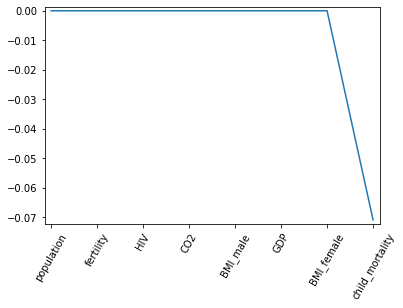

In [40]:
# Plot the coefficients
columns = ['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP', 'BMI_female', 'child_mortality']
plt.plot(range(len(columns)), lasso_coef)
plt.xticks(range(len(columns)), columns, rotation=60)
plt.margins(0.02)
plt.show()

### Regularization Example II: Ridge

Lasso is excellent for feature selection, but when building regression models, Ridge regression should be our first choice.

Recall that lasso performs regularization by adding to the loss function a penalty term of the absolute value of each coefficient multiplied by some alpha. This is also known as `L1` regularization because the regularization term is the `L1` norm of the coefficients. This is not the only way to regularize, however.

If instead, we took the sum of the squared values of the coefficients multiplied by some alpha-like in Ridge regression - you would be computing the `L2` norm. In this example, we will practice fitting ridge regression models over a range of different alphas, and plot cross-validated R<sup>2</sup> scores for each.

In [41]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

In [42]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [43]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

In [44]:
# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

**Note** The argument `normalize`: setting this equal to `True` ensures that all our variables are on the same scale, and we will cover this in more depth later.

In [45]:
# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

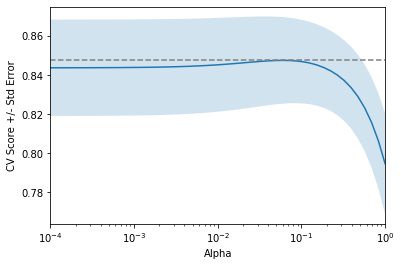

In [46]:
# Display the plot
display_plot(ridge_scores, ridge_scores_std)

The best value for `alpha` is 0.1